# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated.

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [1]:
import pandas as pd

link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
df_main.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7


In [2]:
df_opinion.head()

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad


In [3]:
def translate(
    opinion: str
) -> str:
    mod = {
        "bad": "météo défavorable",
        "very bad": "météo très défavorable",
        "not good not bad": "météo correcte",
        "good": "météo favorable",
        "very good": "météo idéale"
    }
    return mod.get(opinion, opinion)

In [4]:
def create_month_day(
    df: pd.DataFrame
):
    df['YEAR'] = df['DATE'].apply(lambda x: x.year)
    df["MONTH"] = df["DATE"].apply(lambda x: x.month)
    df["DAY"] = df["DATE"].apply(lambda x: x.day)
    return df

In [5]:

def create_and_fill(
    df: pd.DataFrame,
    year: int
):
    print(f"Creating flag, year, months, days column...")
    df['flag'] = df['OPINION'].isna()
    df["OPINION"].fillna("Unknown", inplace=True)

    print(f"Translating Opinion column...")
    df["OPINION"] = df["OPINION"].apply(translate)

    print(f"Filling missing values dataframe...")
    mean_weather_column = df['WEATHER_CODE_EVENING'].median()
    df['WEATHER_CODE_EVENING'].fillna(
        mean_weather_column,
        inplace = True
    )
    df["TOTAL_SNOW_MM"].fillna(0.0, inplace=True)

    df["UV_INDEX"].fillna(df["UV_INDEX"].median(), inplace=True)
    df["SUNHOUR"].bfill(inplace= True)
    print("Date to Datetime Format...")
    print("-"*5)
    return df

In [6]:
def merge(
    main: pd.DataFrame,
    op: pd.DataFrame,
    year: int,
    left: str = "DATE",
    right: str = "date",
):
    print(f"Merging {year} Dataframes...")
    df = pd.merge(
        main,
        op,
        left_on=left,
        right_on=right,
        how='left'
        )
    df.drop(
        right,
        axis = 1,
        inplace = True
    )
    print("-"*5)
    return df


In [7]:
def add_dfs(
    df:pd.DataFrame,
):
    for y in range(2019, 2023):
        print(f"Adding {y} Dataframes...")
        we_csv = f"weather{y}.csv"
        we_main = (
            f"https://raw.githubusercontent.com/WildCodeSchool/"
        )
        we_main += (
            f"data-training-resources/main/quests/{we_csv}"
        )
        main = pd.read_csv(we_main)
        df = pd.concat([df, main])
        print("-"*5)
    return df

In [8]:
def fetch_dataframes():
    full_df = pd.DataFrame()
    print("Start downloading dataframes...")
    print("-"*40)
    for y in range(2010, 2019):
        main_csv = f"weather_main_{y}.csv"
        op_csv = f"weather_opinion_{y}.csv"
        l_main = (
            f"https://raw.githubusercontent.com/WildCodeSchool/"
        )
        l_main += (
            f"data-training-resources/main/quests/{main_csv}"
        )
        l_op = (
            f"https://raw.githubusercontent.com/WildCodeSchool/"
        )
        l_op += (
            f"data-training-resources/main/quests/{op_csv}"
        )
        main = pd.read_csv(l_main)
        op = pd.read_csv(l_op)
        df = merge(main, op, y)
        full_df = pd.concat([full_df, df])
    full_df = add_dfs(full_df)
    full_df = create_and_fill(full_df, y)
    full_df["DATE"] = pd.to_datetime(full_df["DATE"])
    full_df = create_month_day(full_df)
    print("-"*40)
    return full_df

df = fetch_dataframes()

Start downloading dataframes...
----------------------------------------
Merging 2010 Dataframes...
-----
Merging 2011 Dataframes...
-----
Merging 2012 Dataframes...
-----
Merging 2013 Dataframes...
-----
Merging 2014 Dataframes...
-----
Merging 2015 Dataframes...
-----
Merging 2016 Dataframes...
-----
Merging 2017 Dataframes...
-----
Merging 2018 Dataframes...
-----
Adding 2019 Dataframes...
-----
Adding 2020 Dataframes...
-----
Adding 2021 Dataframes...
-----
Adding 2022 Dataframes...
-----
Creating flag, year, months, days column...
Translating Opinion column...
Filling missing values dataframe...
Date to Datetime Format...
-----
----------------------------------------


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [9]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv

for year in range(2010, 2019):
    print("Check au dessus...")
    pass

Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...


## Add 2019 to 2022

In [10]:
# Each year since 2019 (included) has 1 source : weatherYYYY.csv
# Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv
link2019 = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"
for year in range(2010, 2019):
    print("Check au dessus...")
    pass



Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...
Check au dessus...


In [11]:
df.to_csv("test.csv")

In [12]:
df["MAX_TEMPERATURE_C"].isna().sum()

0

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 13 seasonality for the 13 summers/winters alternance.




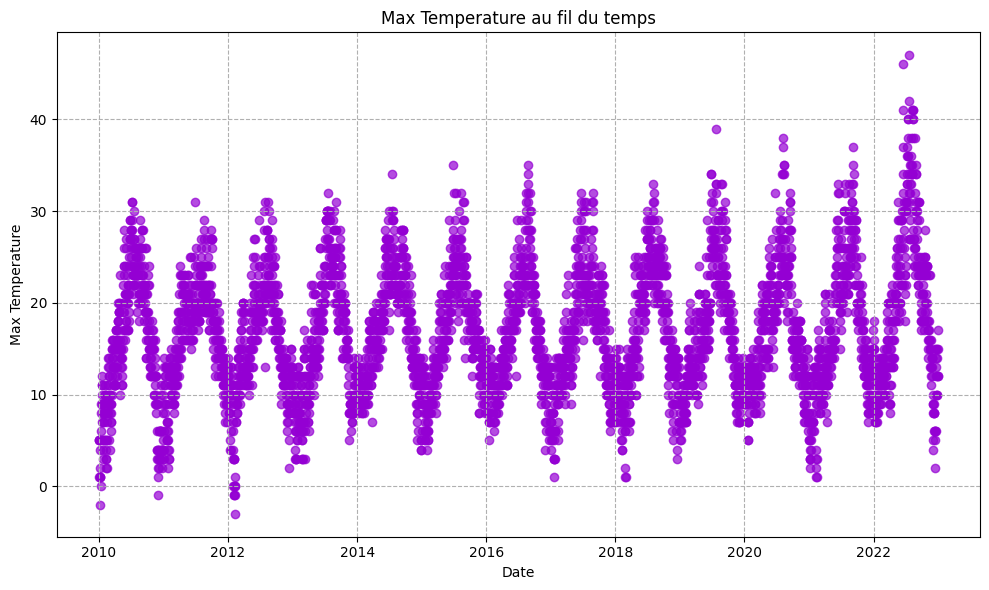

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df['DATE'],
    df['MAX_TEMPERATURE_C'],
    color='darkviolet',
    alpha= 0.7
)
plt.title('Max Temperature au fil du temps')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.grid(True, ls="--")

plt.tight_layout()
plt.show()



Find appropriate dataviz to answer to this question :

Which year had the best weather? Are years very different or not ?


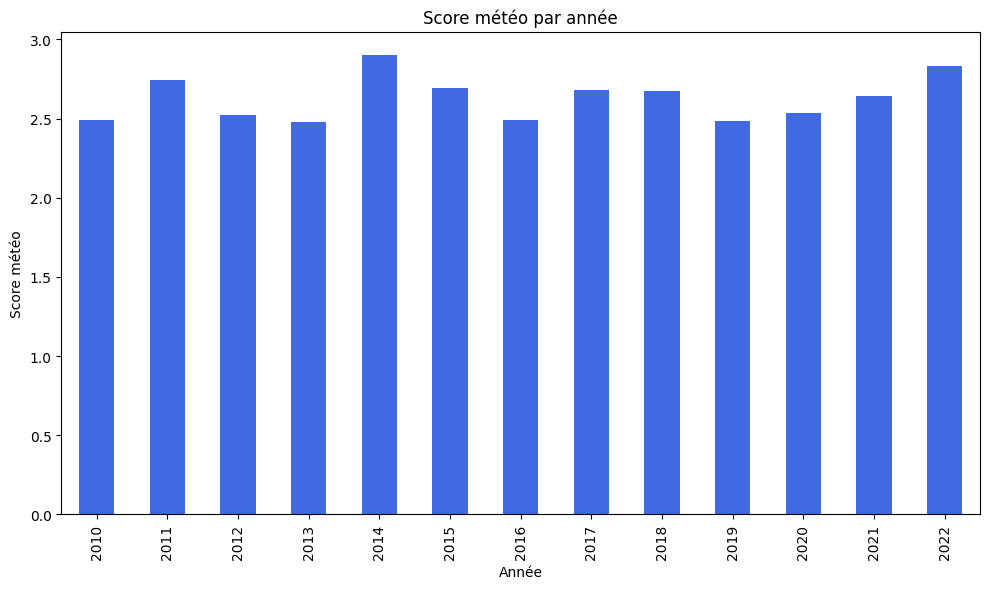

In [19]:
opinion = {
    "météo très défavorable": 1,
    "météo défavorable": 2,
    "météo correcte": 3,
    "météo favorable": 4,
    "météo idéale": 5,
    "Unknown": None
}

df['OPINION_SCORE'] = df['OPINION'].map(opinion)

yearly_scores = df.groupby('YEAR')['OPINION_SCORE'].mean()

plt.figure(figsize=(10, 6))
yearly_scores.plot(kind='bar', color='royalblue')
plt.title('Score météo par année')
plt.ylabel('Score météo')
plt.xlabel('Année')
plt.tight_layout()
plt.show()


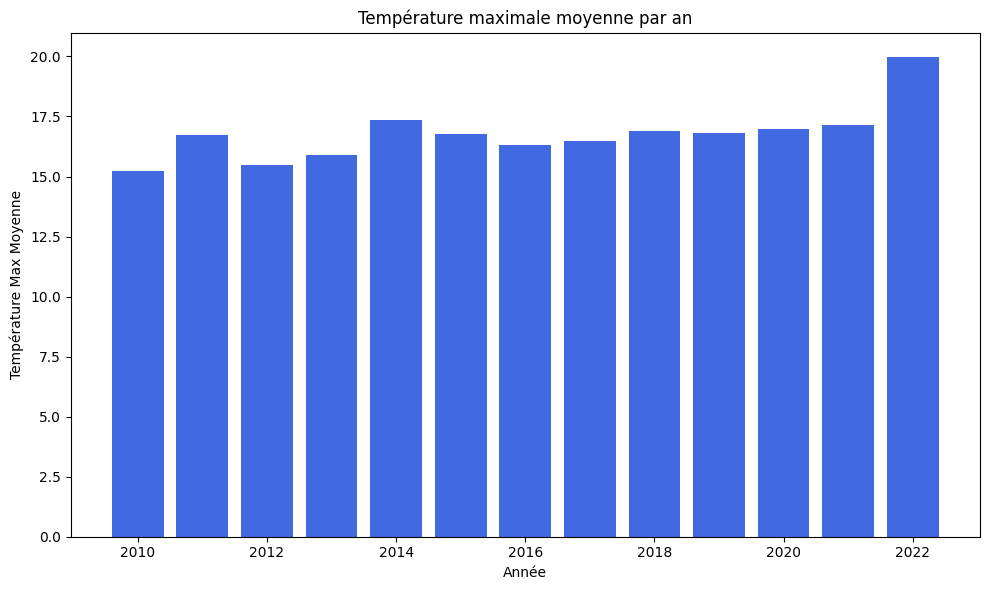

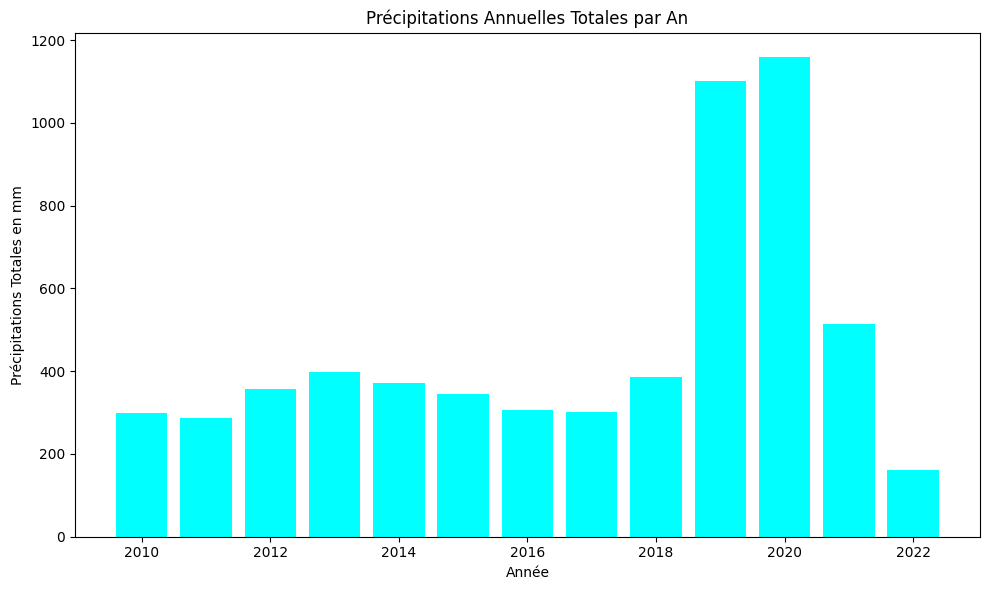

In [15]:
plt.figure(figsize=(10, 6))
years = df['YEAR'].unique()
mean_temps = df.groupby('YEAR')['MAX_TEMPERATURE_C'].mean().values
plt.bar(years, mean_temps, color='royalblue')
plt.title('Température maximale moyenne par an')
plt.ylabel('Température Max Moyenne')
plt.xlabel('Année')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
total_precip = df.groupby('YEAR')['PRECIP_TOTAL_DAY_MM'].sum().values
plt.bar(years, total_precip, color='cyan')
plt.title('Précipitations Annuelles Totales par An')
plt.ylabel('Précipitations Totales en mm')
plt.xlabel('Année')
plt.tight_layout()
plt.show()